In [187]:
# import basic libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

In [188]:
data = pd.read_csv('./ANZdataset.csv')

In [189]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [190]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [191]:
#verifying number of unique accounts
data["account"].nunique()

100

In [192]:
print('Data type of each column of Dataframe :')
print(data.dtypes)

Data type of each column of Dataframe :
status                object
card_present_flag    float64
bpay_biller_code      object
account               object
currency              object
long_lat              object
txn_description       object
merchant_id           object
merchant_code        float64
first_name            object
balance              float64
date                  object
gender                object
age                    int64
merchant_suburb       object
merchant_state        object
extraction            object
amount               float64
transaction_id        object
country               object
customer_id           object
merchant_long_lat     object
movement              object
dtype: object


In [193]:
#statistical description of continuous variables.
data.describe() 

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [194]:
#checking for total null values
data.isnull().sum() 

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

Preliminary Understanding of the Dataset

The dataset contains 12043 rows of transactions of 100 unique customers. For each row, innformation is complete for most of the columns, with the exception of 'card_present_flag', bpay_biller_code, merchant_id, merchant_code, merchant_suburb, merchant_state, and 'merchant_long_lat'. This is likely due to the type of transaction where not every transaction is involved with a merchants (such as PAY/SALARY).

Some of the columns can be dropped as they will not be very useful for our analysis or contain too many NaN values.

In [195]:
#Dropping Columns

filtered_data = data[['status', 'txn_description', 'balance', 
             'date', 'gender', 'age', 'amount', 'customer_id', 'long_lat',
             'merchant_long_lat', 'movement' ]]

#creating month column
filtered_data["month"]= data['date'].str.split("/", n = 2, expand = True)[1] 

filtered_data.head()

,status,txn_description,balance,date,gender,age,amount,customer_id,long_lat,merchant_long_lat,movement,month
0,authorized,POS,35.39,1/8/18,F,26,16.25,CUS-2487424745,153.41 -27.95,153.38 -27.99,debit,8
1,authorized,SALES-POS,21.20,1/8/18,F,26,14.19,CUS-2487424745,153.41 -27.95,151.21 -33.87,debit,8
2,authorized,POS,5.71,1/8/18,M,38,6.42,CUS-2142601169,151.23 -33.94,151.21 -33.87,debit,8
3,authorized,SALES-POS,2117.22,1/8/18,F,40,40.90,CUS-1614226872,153.10 -27.66,153.05 -26.68,debit,8
4,authorized,SALES-POS,17.95,1/8/18,F,26,3.25,CUS-2487424745,153.41 -27.95,153.44 -28.06,debit,8


Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

In [199]:
for col in filtered_data.select_dtypes(include=['object']).columns:
    print(col)
    print("Number of Unique Values: ", end = '')
    print(filtered_data[col].nunique())
    print(filtered_data[col].value_counts())
    print('\n')

status
Number of Unique Values: 2
authorized    7717
posted        4326
Name: status, dtype: int64


txn_description
Number of Unique Values: 6
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


date
Number of Unique Values: 91
28/9/18     174
17/8/18     172
5/10/18     168
17/10/18    162
14/9/18     161
3/10/18     160
21/9/18     160
4/10/18     159
27/9/18     159
19/10/18    158
3/8/18      157
26/10/18    157
24/8/18     156
12/10/18    154
13/9/18     154
31/8/18     153
2/8/18      152
6/9/18      152
23/8/18     152
7/9/18      152
10/8/18     151
18/10/18    150
22/8/18     150
5/9/18      149
12/9/18     149
26/9/18     149
9/8/18      149
19/9/18     148
24/10/18    148
10/10/18    146
           ... 
19/8/18     118
21/8/18     118
4/8/18      118
11/9/18     118
14/8/18     117
25/9/18     117
26/8/18     116
7/8/18      114
23/9/18     114
9/10/18     113
17/9/18     112

# Interesting Insight: Average transaction amount? 

In [215]:
#for each transaction type, find the average transaction amount

for transaction in filtered_data.txn_description.unique():
    print("Transaction Type: " + transaction)
    print("Average Transaction Amount: ", end= '')
    print(filtered_data[filtered_data['txn_description'] ==transaction].amount.mean())
    print("Average Number of Transactions: ", end = '')
    print(filtered_data[filtered_data['txn_description'] ==transaction].shape[0])

Transaction Type: POS
Average Transaction Amount: 40.407412106793586
Average Number of Transactions: 3783
Transaction Type: SALES-POS
Average Transaction Amount: 39.90978901881027
Average Number of Transactions: 3934
Transaction Type: PAYMENT
Average Transaction Amount: 77.61307692307692
Average Number of Transactions: 2600
Transaction Type: INTER BANK
Average Transaction Amount: 86.69946091644205
Average Number of Transactions: 742
Transaction Type: PAY/SALARY
Average Transaction Amount: 1898.7280294450716
Average Number of Transactions: 883
Transaction Type: PHONE BANK
Average Transaction Amount: 106.0990099009901
Average Number of Transactions: 101


# Interesting Insight: Distribution of Transaction Purchase Amount

In [214]:
# sns.distplot(filtered_data[filtered_data.txn_description.isin(['POS', 'SALES-POS'])].amount)
# plt.title('Histogram of Purchase Transaction Amount', fontsize=18)
# plt.xlabel('Transaction Amount', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

filtered_data[filtered_data.txn_description.isin(['POS', 'SALES-POS'])].amount.describe()

#need to remove outliers

# ax = sns.boxplot(x=filtered_data[filtered_data.txn_description.isin(['POS', 'SALES-POS'])].amount)


count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

# Average Transaction Purchase By Age

# Interesting Insight: Salary by Gender

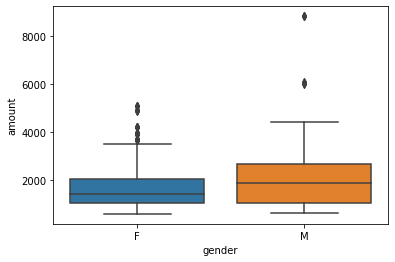

In [218]:
filtered_data[filtered_data.txn_description == 'PAY/SALARY'].amount.describe()
ax = sns.boxplot(x="gender", y=filtered_data[filtered_data.txn_description == 'PAY/SALARY'].amount, data=filtered_data)

# Interesting Insight: How many transactions do customers make each month, on average?

In [202]:
#create months column

filtered_data['month'] = filtered_data['month'].replace({'8': 'Aug', '9': 'Sep', '10': 'Oct'})

for month in filtered_data.month.unique():
    print(month)
    print("Average Transaction Amount: ", end= '')
    print(filtered_data[filtered_data['month'] == month].amount.mean())
    print("Average Number of Transactions: ", end = '')
    print(filtered_data[filtered_data['month'] == month].shape[0])

Aug
Average Transaction Amount: 185.12186659903654
Average Number of Transactions: 3943
Sep
Average Transaction Amount: 182.04590331422853
Average Number of Transactions: 4013
Oct
Average Transaction Amount: 196.42732321996542
Average Number of Transactions: 4087


Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?